# Analysis and visualization of the speed and velocity
## 1. Library imports and setup

In [2]:
library(tidyverse)

In [3]:
Sys.setenv(LANGUAGE="en")
Sys.setlocale("LC_TIME", "English")

theme_set(theme_bw())

[1] "English_United States.1252"

#### Flag determining if plots are to be dumped in the form of files

In [4]:
#flag.make.plots <- TRUE
flag.make.plots <- FALSE

#### Determining the dpi and the image output path for publication high quality plots

In [5]:
dpi.opt <- 1000

In [6]:
IMG.path <- "../../IMG"

## 2. Import of the clean data

In [7]:
data.path <- "../../data"

file.name <- "df_v_merged.rds"
df.v.merged <- readRDS(paste0(data.path,"/",file.name))
head(df.v.merged)

,date_time,speed,heading,velocityN,velocityE,depth,site,kelp,m.yr.factor,w.yr.factor,depth.raw
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<fct>,<fct>,<ord>,<ord>,<fct>
1,2021-08-13 00:00:00,1.89,180.44,-1.89,-0.01,7 [m],GF,FALSE,Aug21,W33-21,7
2,2021-08-13 00:05:00,1.64,177.22,-1.63,0.08,7 [m],GF,FALSE,Aug21,W33-21,7
3,2021-08-13 00:10:00,1.85,177.76,-1.85,0.07,7 [m],GF,FALSE,Aug21,W33-21,7
4,2021-08-13 00:15:00,1.88,179.00,-1.88,0.03,7 [m],GF,FALSE,Aug21,W33-21,7
5,2021-08-13 00:20:00,2.12,200.43,-1.99,-0.74,7 [m],GF,FALSE,Aug21,W33-21,7
6,2021-08-13 00:25:00,2.50,210.17,-2.16,-1.26,7 [m],GF,FALSE,Aug21,W33-21,7


## 3. Theme and colouring setup

In [8]:
site.color <- c(`GF`='#E41A1C', `H`='#FF7F00', `S1`="blue" , `S2`='#377EB8')
colors.velocity <- c('velocityN'='green','velocityE'='darkred')

In [9]:
axis.text.size <- 17
axis.title.size <- 18
strip.text.size <- 20
legend.title.size <- axis.title.size
legend.text.size <- axis.text.size

In [10]:
time_series_theme <- theme(panel.grid.minor.x = element_blank(), 
      panel.grid.major.x = element_blank(),
      
      axis.text = element_text(size=18),
      axis.title = element_text(size = 19),
      
      strip.text=element_text(size=20),
      legend.position="none")

In [11]:
hist_theme <- theme(legend.position = "none",
      panel.grid.minor.x = element_blank(), 
      panel.grid.major.x = element_blank(),
      axis.text = element_text(size=18),
      axis.title = element_text(size = 19),
      strip.text=element_text(size=20))

In [12]:
boxplot_theme_v <- theme(axis.title = element_text(size=22),
                 axis.text = element_text(size=19),
                 strip.text=element_text(size=22),
                 panel.grid.minor.x = element_blank(),
                 panel.grid.major.x = element_blank(),
                 legend.position="top",
                 legend.key.size = unit(1.5, 'cm'),
                 legend.title = element_text(size=20), #change legend title font size
                 legend.text = element_text(size=18))

#### Determinaion of the month ranges for proper display of the boxplots

In [13]:
c.v <- df.v.merged$m.yr.factor >= 'Jul21' & df.v.merged$m.yr.factor <= "Aug23"
lev.m.yr.f.v <- levels(df.v.merged$m.yr.factor)
lev.c.v <- lev.m.yr.f.v[ match('Jul21',lev.m.yr.f.v):match("Aug23",lev.m.yr.f.v)]

### Velocities

In [14]:
feat.label <- "velocity [cm/s]"
feat <- "velocity"

In [15]:
cnames <- colnames(df.v.merged)
tmp.dfN <- df.v.merged[cnames[-match(c('velocityN','velocityE','speed','heading'),cnames)]]
tmp.dfN["velocity"] <-  df.v.merged['velocityN']
tmp.dfN["vel.dir"] <- "velocityN"

tmp.dfE <- df.v.merged[cnames[-match(c('velocityN','velocityE','speed','heading'),cnames)]]
tmp.dfE["velocity"] <-  df.v.merged['velocityE']
tmp.dfE["vel.dir"] <- "velocityE"

tmp.df <- rbind(tmp.dfN,tmp.dfE)
tmp.df$vel.dir <- factor(tmp.df$vel.dir)
tmp.dfN <- NULL
tmp.dfE <- NULL

tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,ordered=TRUE,levels=lev.c.v)

In [16]:
c1v <- tmp.df$m.yr.factor >= 'Jul21' & tmp.df$m.yr.factor <= 'Mar22'
c2v <- tmp.df$m.yr.factor >=  'Apr22' & tmp.df$m.yr.factor <= 'Dec22'
c3v <- tmp.df$m.yr.factor >=  'Jan23' & tmp.df$m.yr.factor <= 'Aug23'

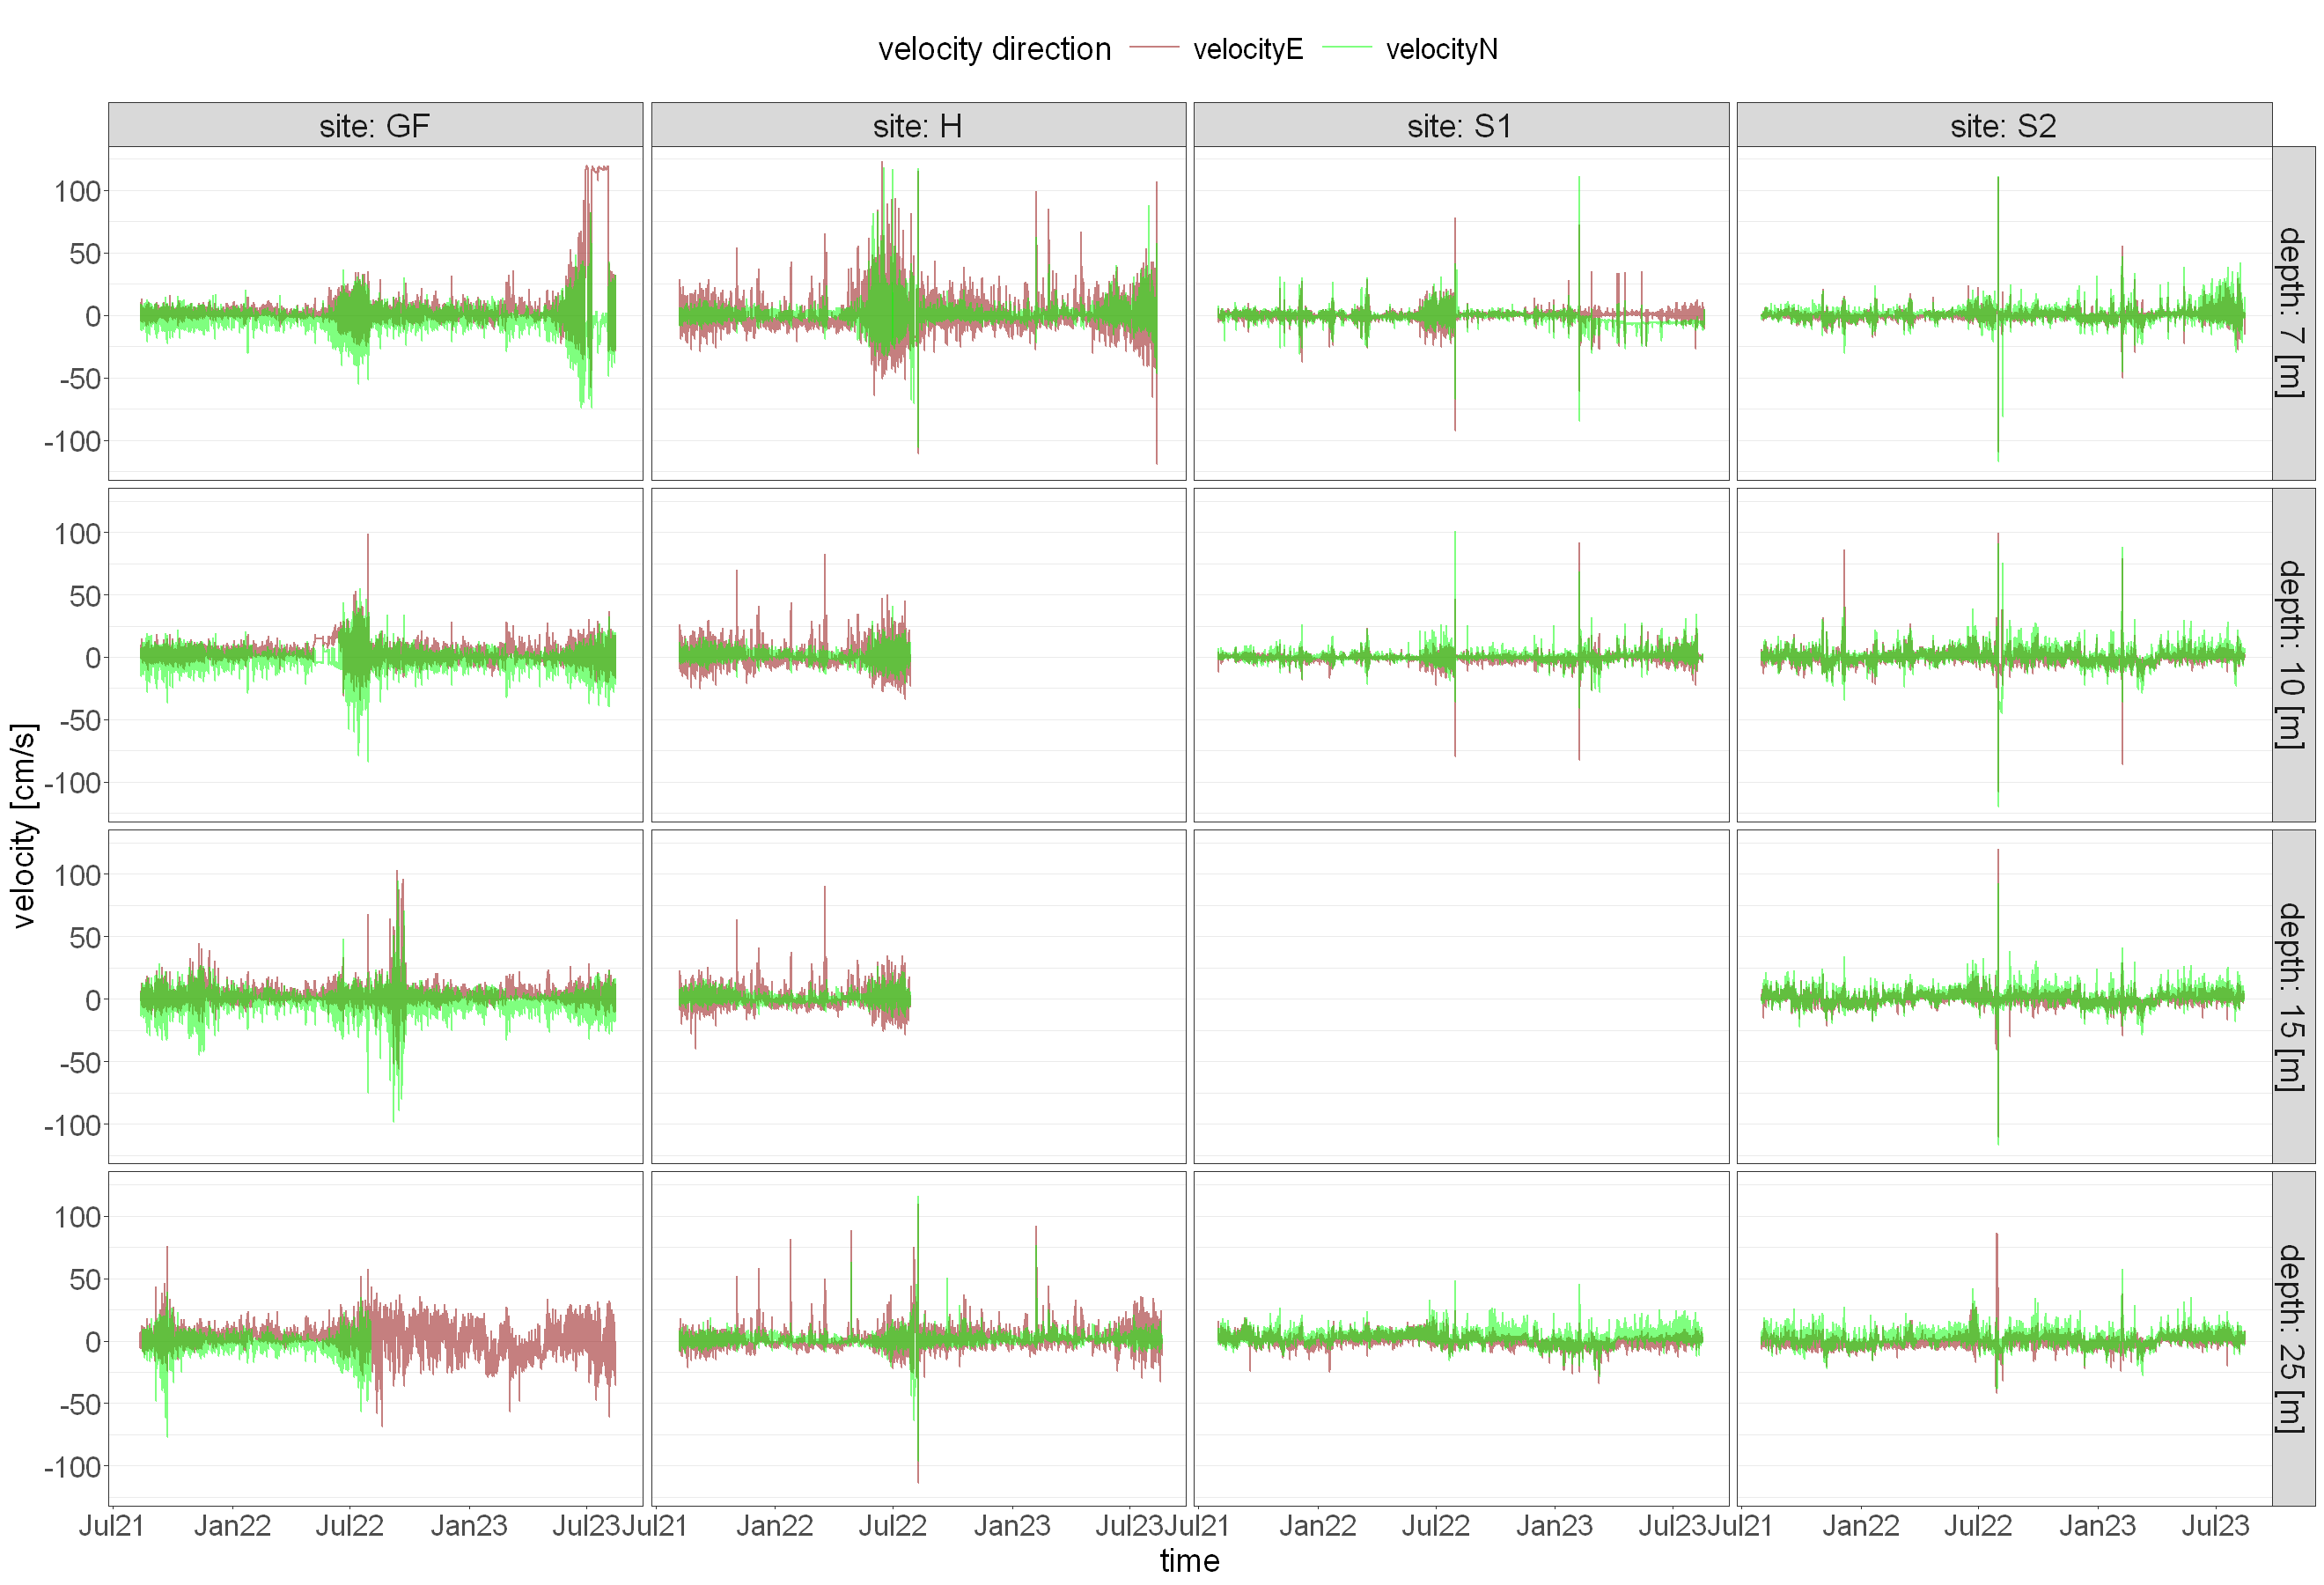

In [17]:
options(repr.plot.height=15,repr.plot.width=22)

ggplot(tmp.df) +
geom_line(aes(x=date_time,y=velocity,col=vel.dir),linewidth=0.7,alpha=0.5) + 
#scale_fill_manual(values=site.color) +
ylab(feat.label)+ xlab("time") +facet_grid(depth~site,labeller = label_both) + #,scales = "free" 

scale_x_datetime(date_labels = "%b%y") +  scale_color_manual(name="velocity direction",values = colors.velocity) + 

theme(panel.grid.minor.x = element_blank(), 
      panel.grid.major.x = element_blank(),
      
      axis.text = element_text(size=20),
      axis.title = element_text(size = 22),
      
      strip.text=element_text(size=22),
      
      legend.position="top",
      legend.key.size = unit(1.5, 'cm'),
      legend.title = element_text(size=22), #change legend title font size
      legend.text = element_text(size=20))

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/time_series/","velNE","_time_series_grid.tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/time_series/small/","velNE","_time_series_grid.jpg"),height = 15, width = 22,dpi = 150)
    #ggsave(paste0(IMG.path"../graphical_abstract/","velNE","_time_series_grid.svg"),height = 15, width = 22)
}

Warning message:
"Removed 109327 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


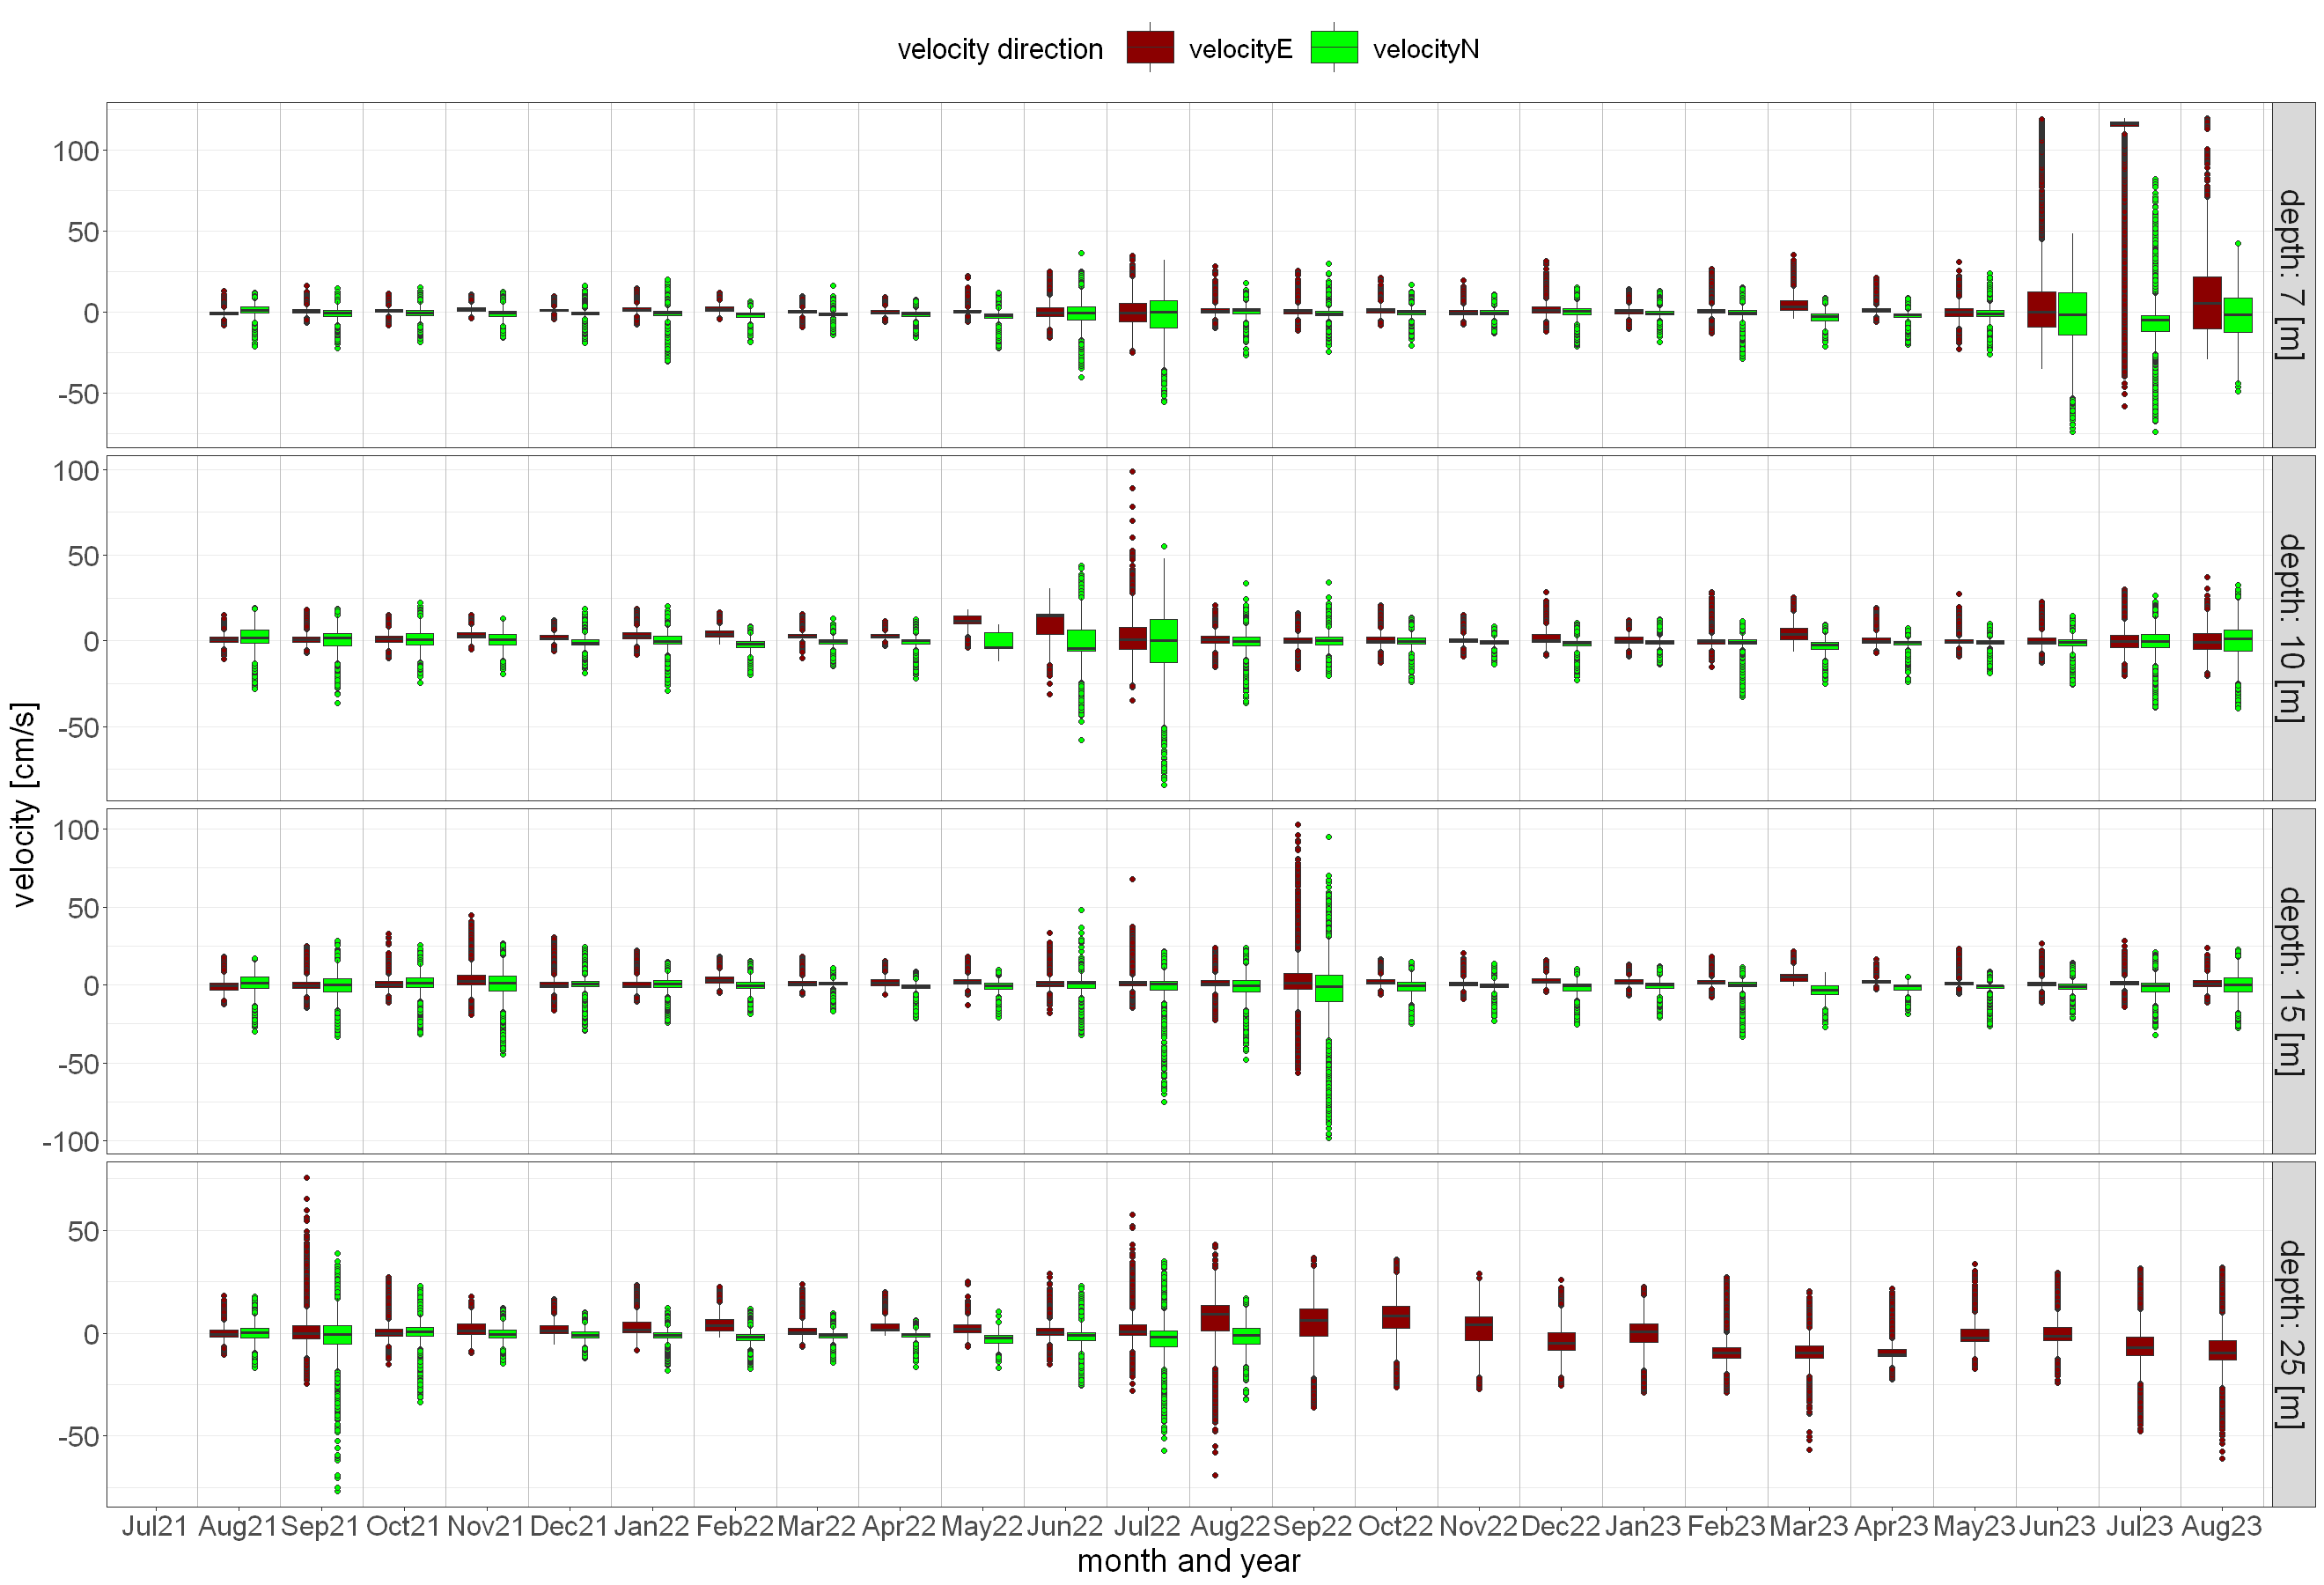

In [18]:
options(repr.plot.height=15,repr.plot.width=22)
pt <- "GF"
ggplot(tmp.df[tmp.df$site==pt,],aes(x=m.yr.factor.tmp,y=velocity,fill=vel.dir)) + 
geom_boxplot( position = position_dodge2(preserve = "single"),outlier.shape = 21) + facet_grid(depth~.,scale="free",labeller = label_both) + 
geom_vline(xintercept=seq(1.5, length(levels(tmp.df$m.yr.factor))-0.5, 1),lwd=0.5, colour="gray") +
scale_fill_manual(name="velocity direction", values=colors.velocity,drop = FALSE)+ scale_x_discrete(drop = FALSE)+
boxplot_theme_v +
      xlab("month and year") + ylab("velocity [cm/s]") #+ ggtitle("Boxplots of velocity at GF")

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/boxplots/velocity/",feat,"_",pt,"_boxplots.tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/velocity/small/",feat,"_",pt,"_boxplots.jpg"),height = 15, width = 22,dpi = 150)
}

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`)."


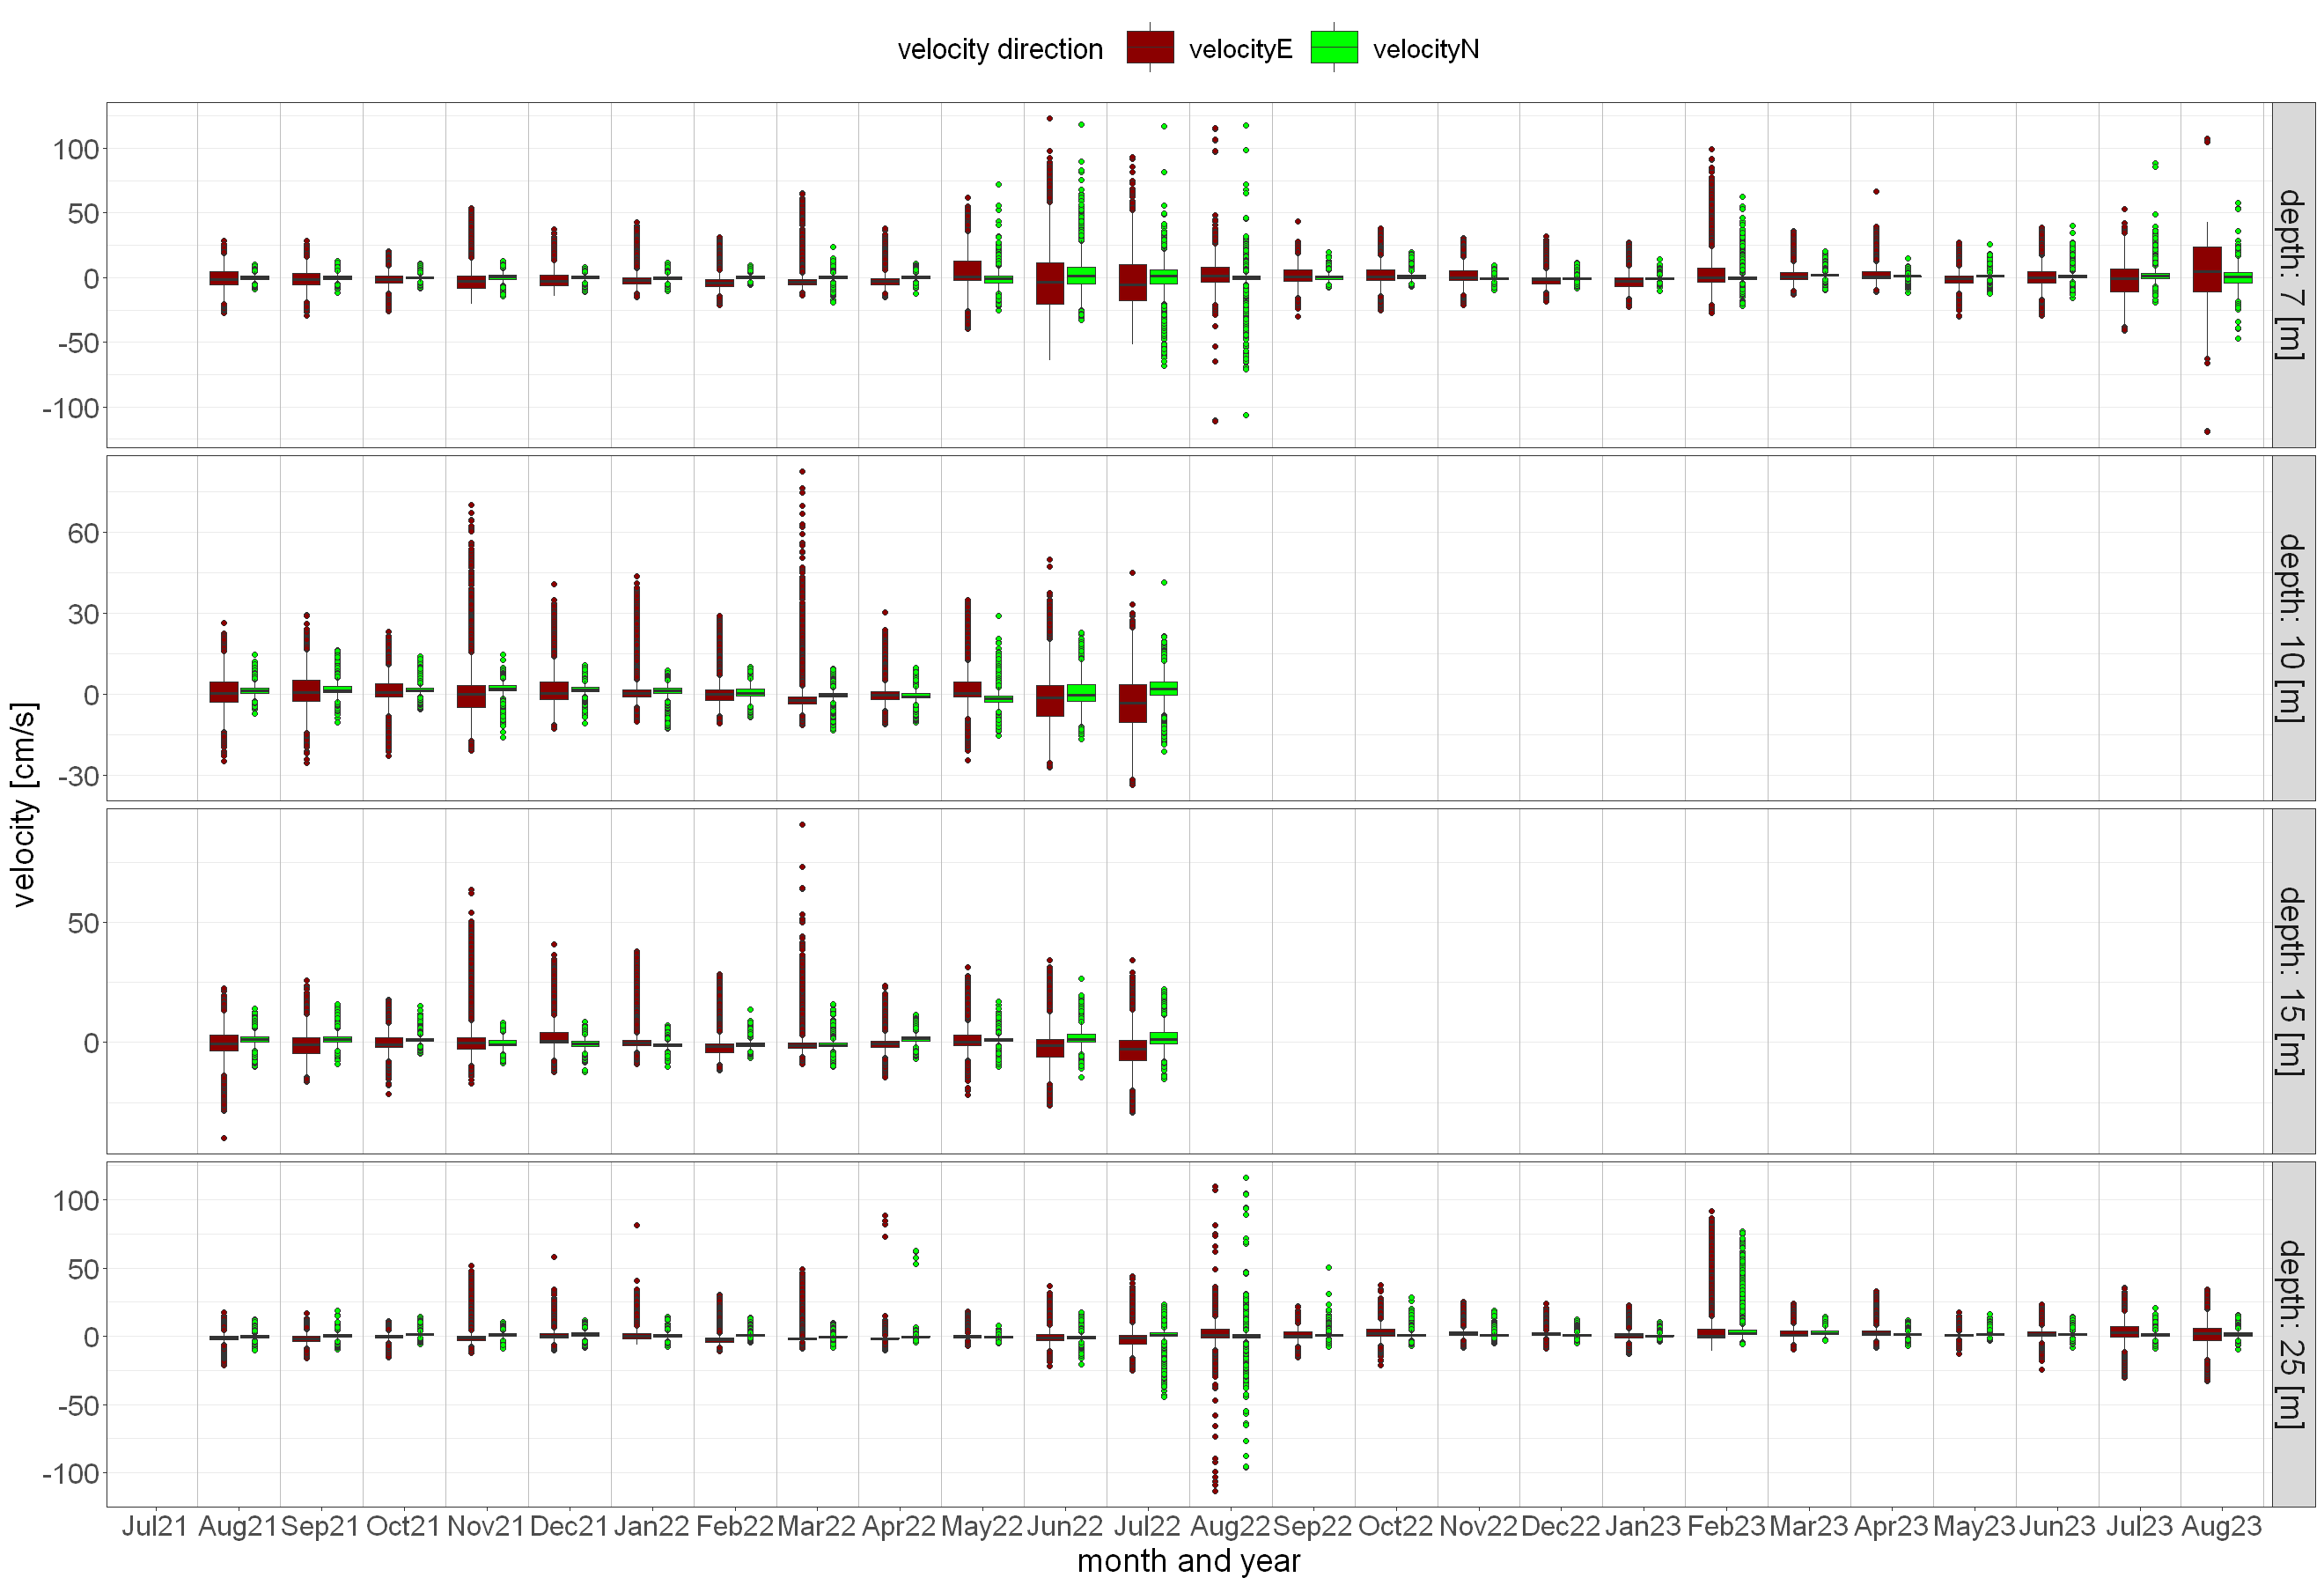

In [19]:
options(repr.plot.height=15,repr.plot.width=22)
pt <- "H"
ggplot(tmp.df[tmp.df$site==pt,],aes(x=m.yr.factor.tmp,y=velocity,fill=vel.dir)) + 
geom_boxplot( position = position_dodge2(preserve = "single"),outlier.shape = 21) + facet_grid(depth~.,scale="free",labeller = label_both) + 
geom_vline(xintercept=seq(1.5, length(levels(tmp.df$m.yr.factor))-0.5, 1),lwd=0.5, colour="gray") +
scale_fill_manual(name="velocity direction", values=colors.velocity)+ scale_x_discrete(drop = FALSE)+
boxplot_theme_v +
      xlab("month and year") + ylab("velocity [cm/s]") #+ ggtitle("Boxplots of velocity at H")

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/boxplots/velocity/",feat,"_",pt,"_boxplots.tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/velocity/small/",feat,"_",pt,"_boxplots.jpg"),height = 15, width = 22,dpi = 150)
}

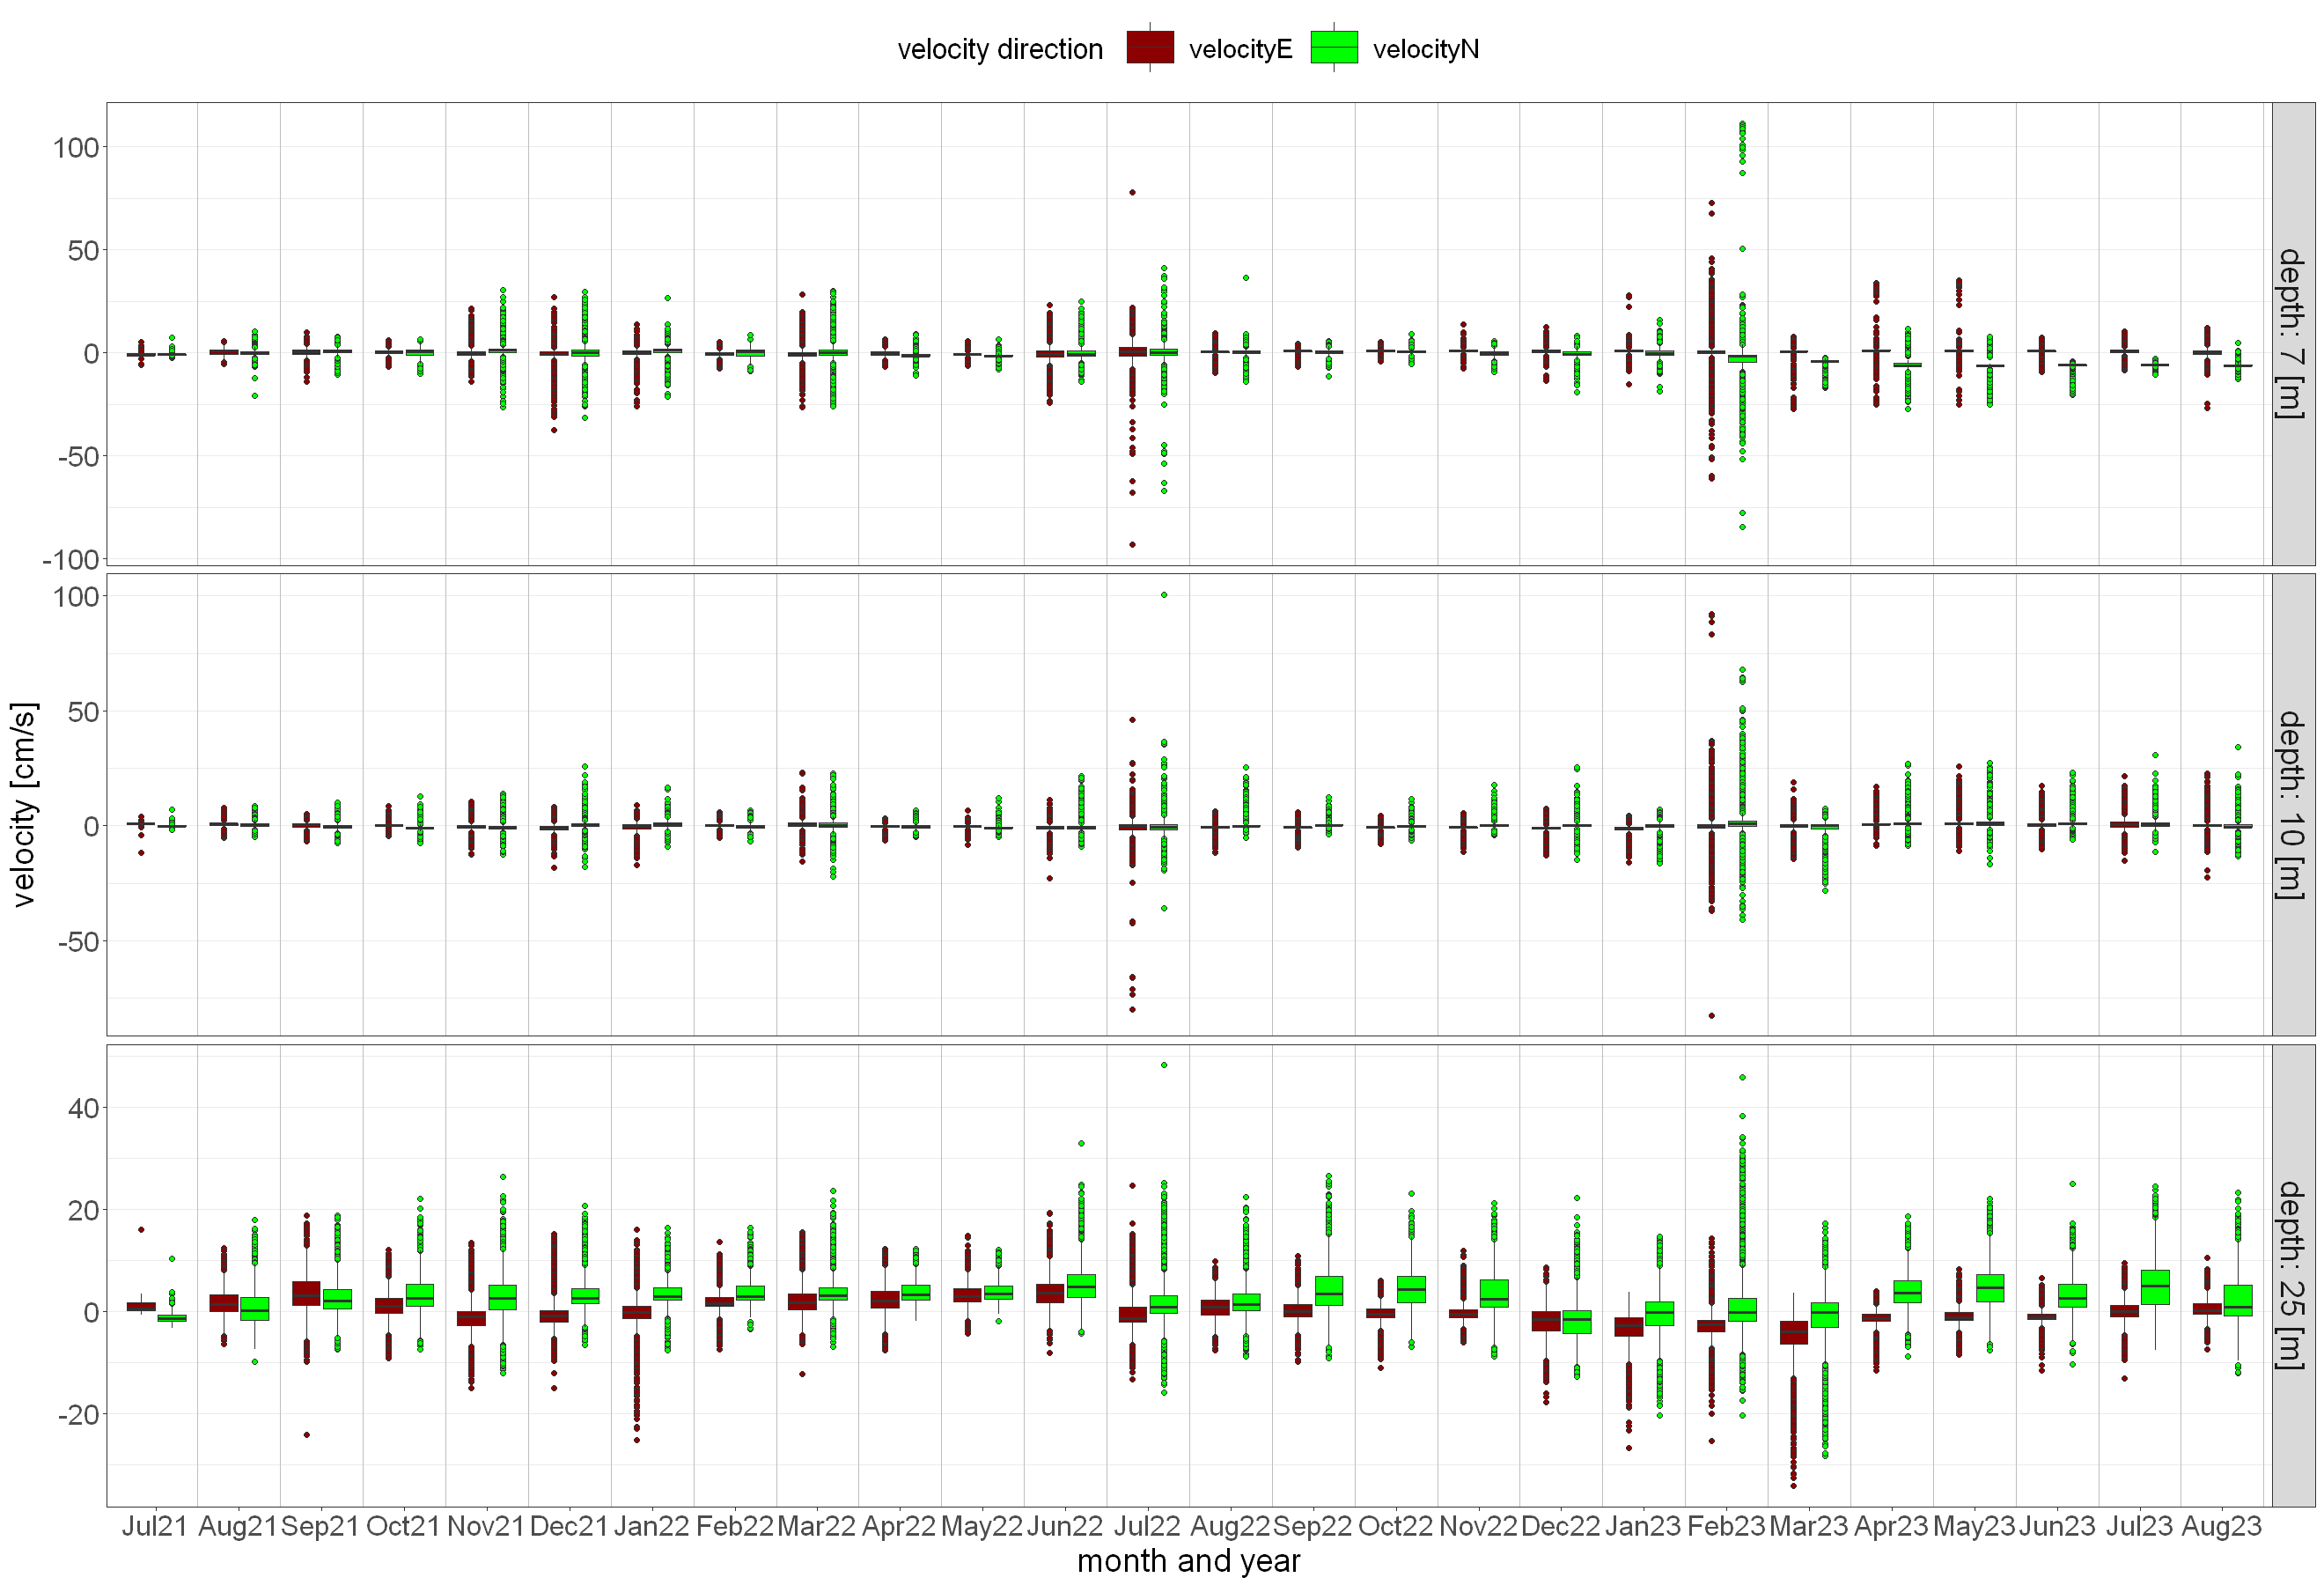

In [20]:
options(repr.plot.height=15,repr.plot.width=22)
pt <- "S1"
ggplot(tmp.df[tmp.df$site==pt,],aes(x=m.yr.factor.tmp,y=velocity,fill=vel.dir)) + 
geom_boxplot( position = position_dodge2(preserve = "single"),outlier.shape = 21) + facet_grid(depth~.,scale="free",labeller = label_both) + 
geom_vline(xintercept=seq(1.5, length(levels(tmp.df$m.yr.factor))-0.5, 1),lwd=0.5, colour="gray") +
scale_fill_manual(name="velocity direction", values=colors.velocity)+ scale_x_discrete(drop = FALSE)+
boxplot_theme_v +
      xlab("month and year") + ylab("velocity [cm/s]") #+ ggtitle("Boxplots of velocity at S1")

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/boxplots/velocity/",feat,"_",pt,"_boxplots.tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/velocity/small/",feat,"_",pt,"_boxplots.jpg"),height = 15, width = 22,dpi = 150)
    #ggsave(paste0(IMG.path,"/graphical_abstract/",feat,"_",pt,"_boxplots.svg"),height = 15, width = 22) 
}

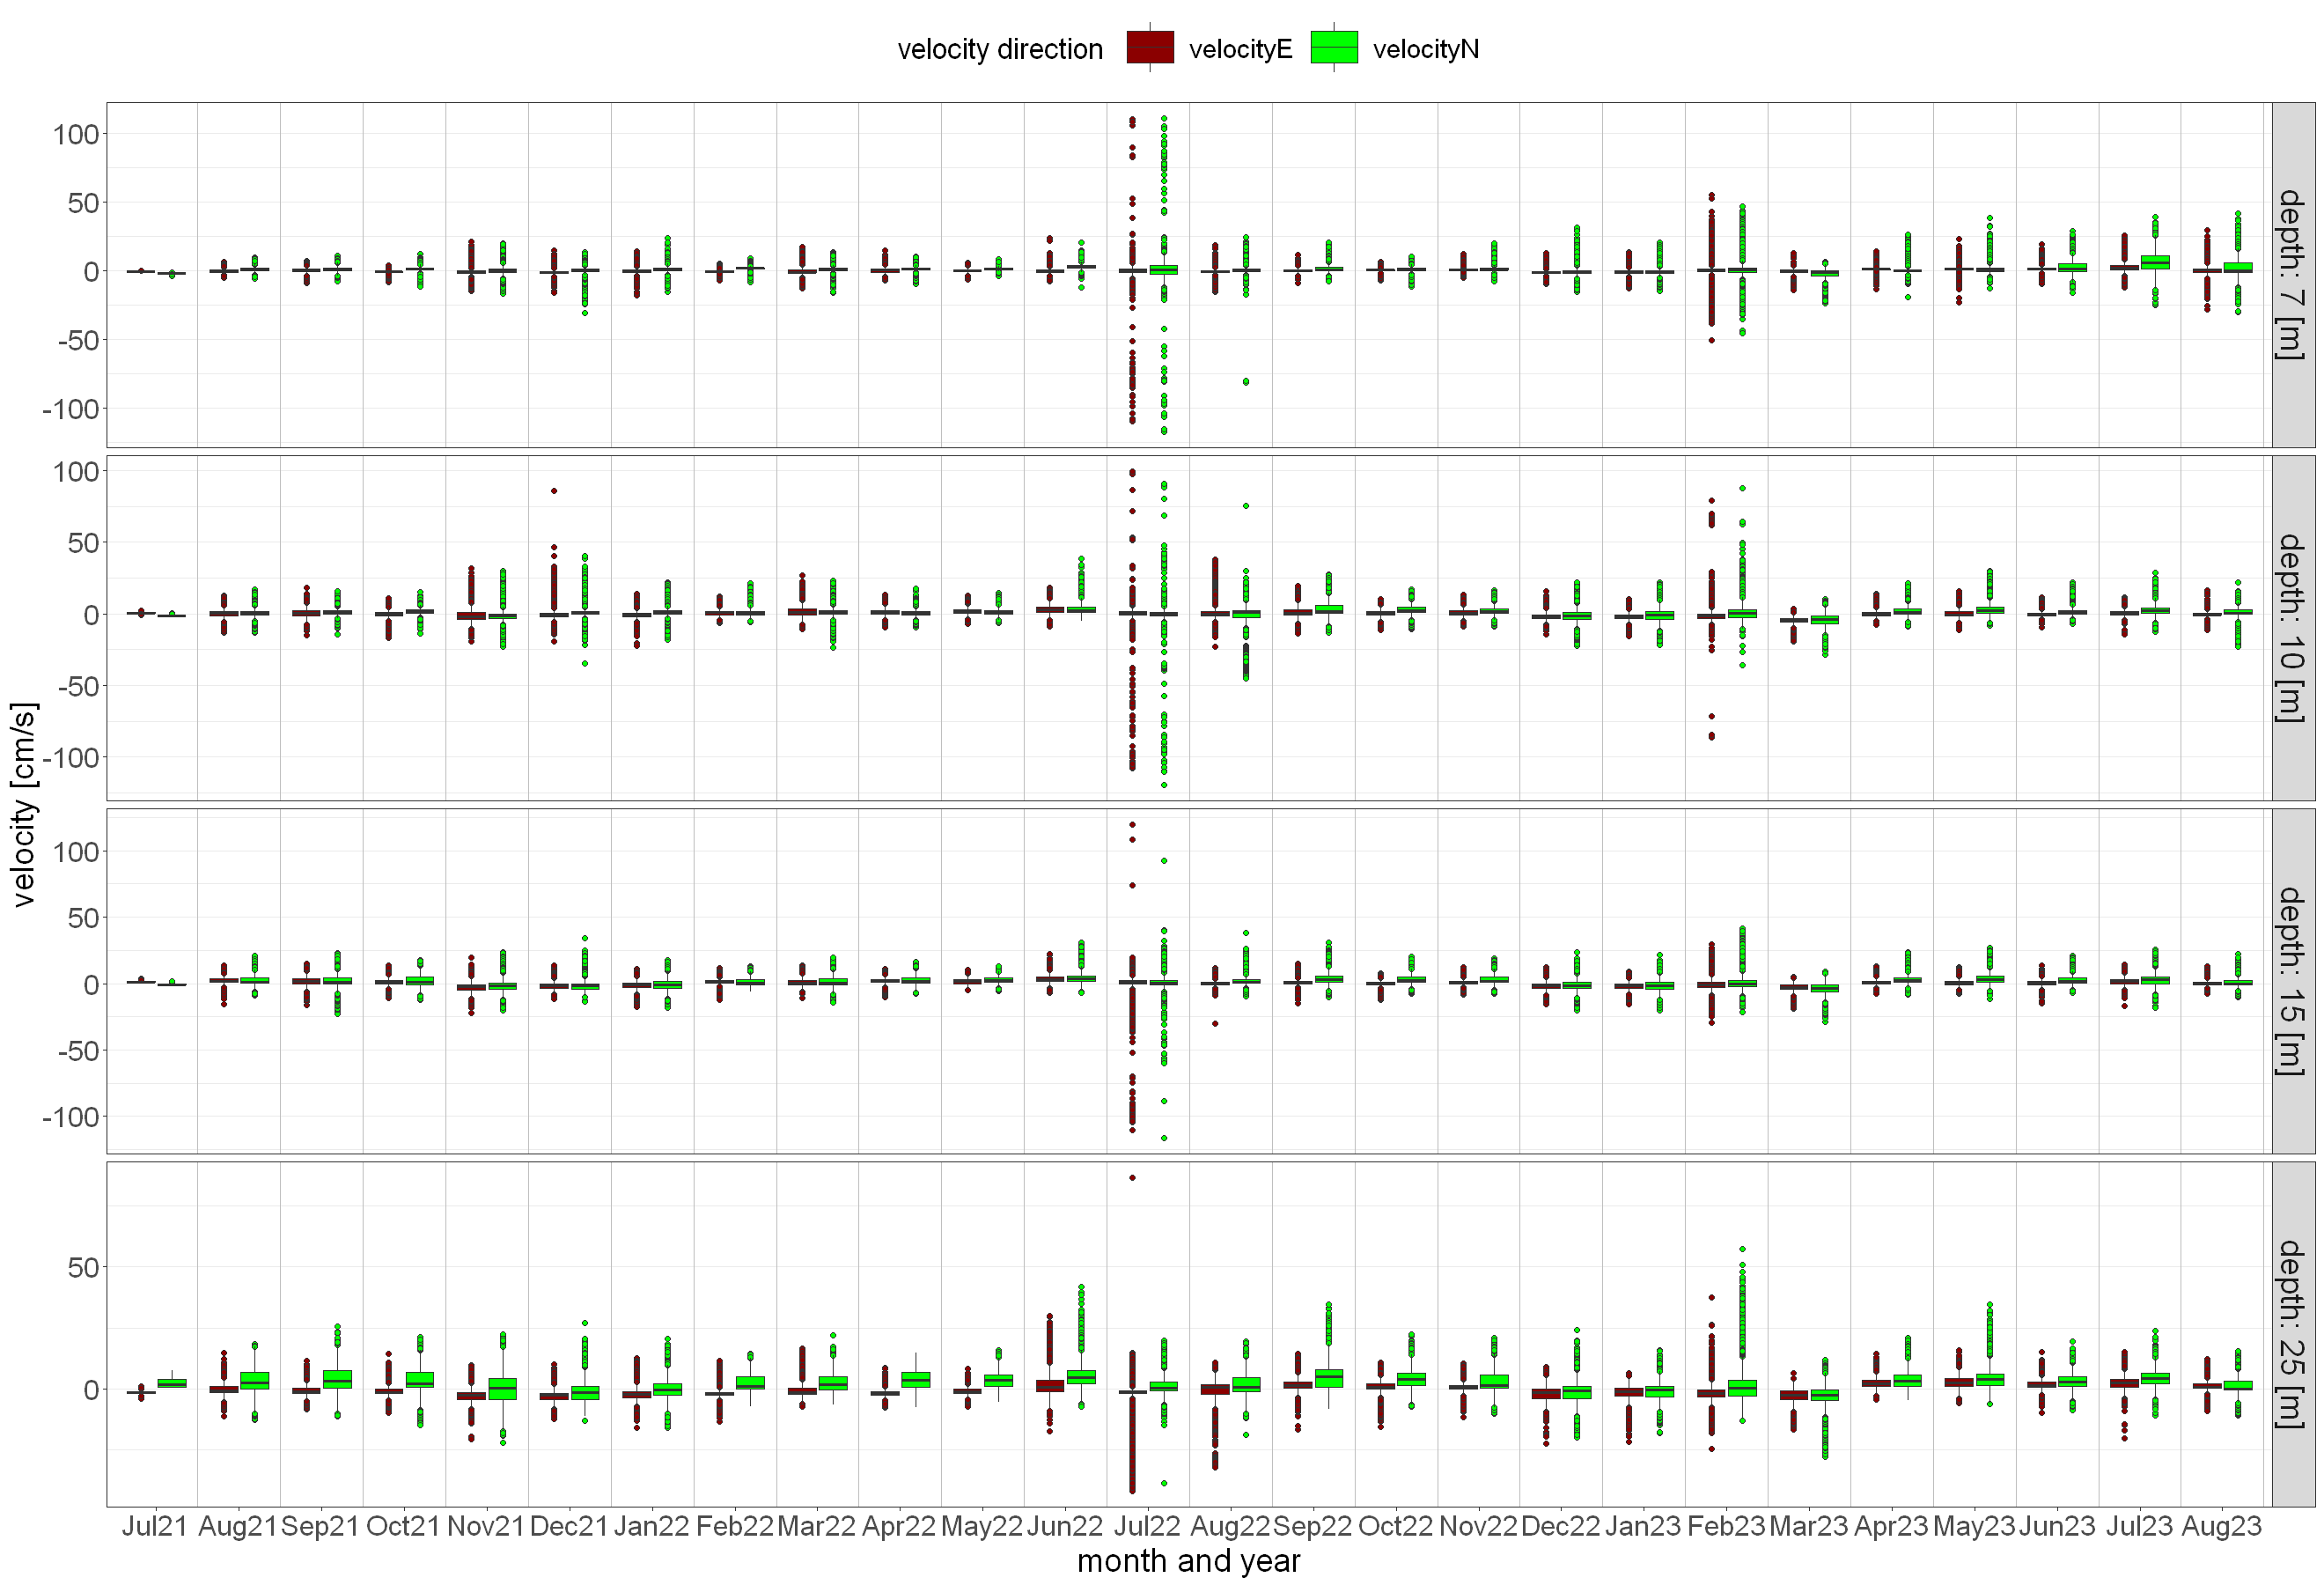

In [21]:
options(repr.plot.height=15,repr.plot.width=22)
pt <- "S2"
ggplot(tmp.df[tmp.df$site==pt,],aes(x=m.yr.factor.tmp,y=velocity,fill=vel.dir)) + 
geom_boxplot( position = position_dodge2(preserve = "single"),outlier.shape = 21) + facet_grid(depth~.,scale="free",labeller = label_both) + 
geom_vline(xintercept=seq(1.5, length(levels(tmp.df$m.yr.factor))-0.5, 1),lwd=0.5, colour="gray") +
scale_fill_manual(name="velocity direction", values=colors.velocity)+scale_x_discrete(drop = FALSE)+
boxplot_theme_v +
      xlab("month and year") + ylab("velocity [cm/s]") #+ ggtitle("Boxplots of velocity at S2")

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/boxplots/velocity/",feat,"_",pt,"_boxplots.tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/velocity/small/",feat,"_",pt,"_boxplots.jpg"),height = 15, width = 22,dpi = 150)
}

Warning message:
"Removed 109328 rows containing non-finite outside the scale range
(`stat_binhex()`)."


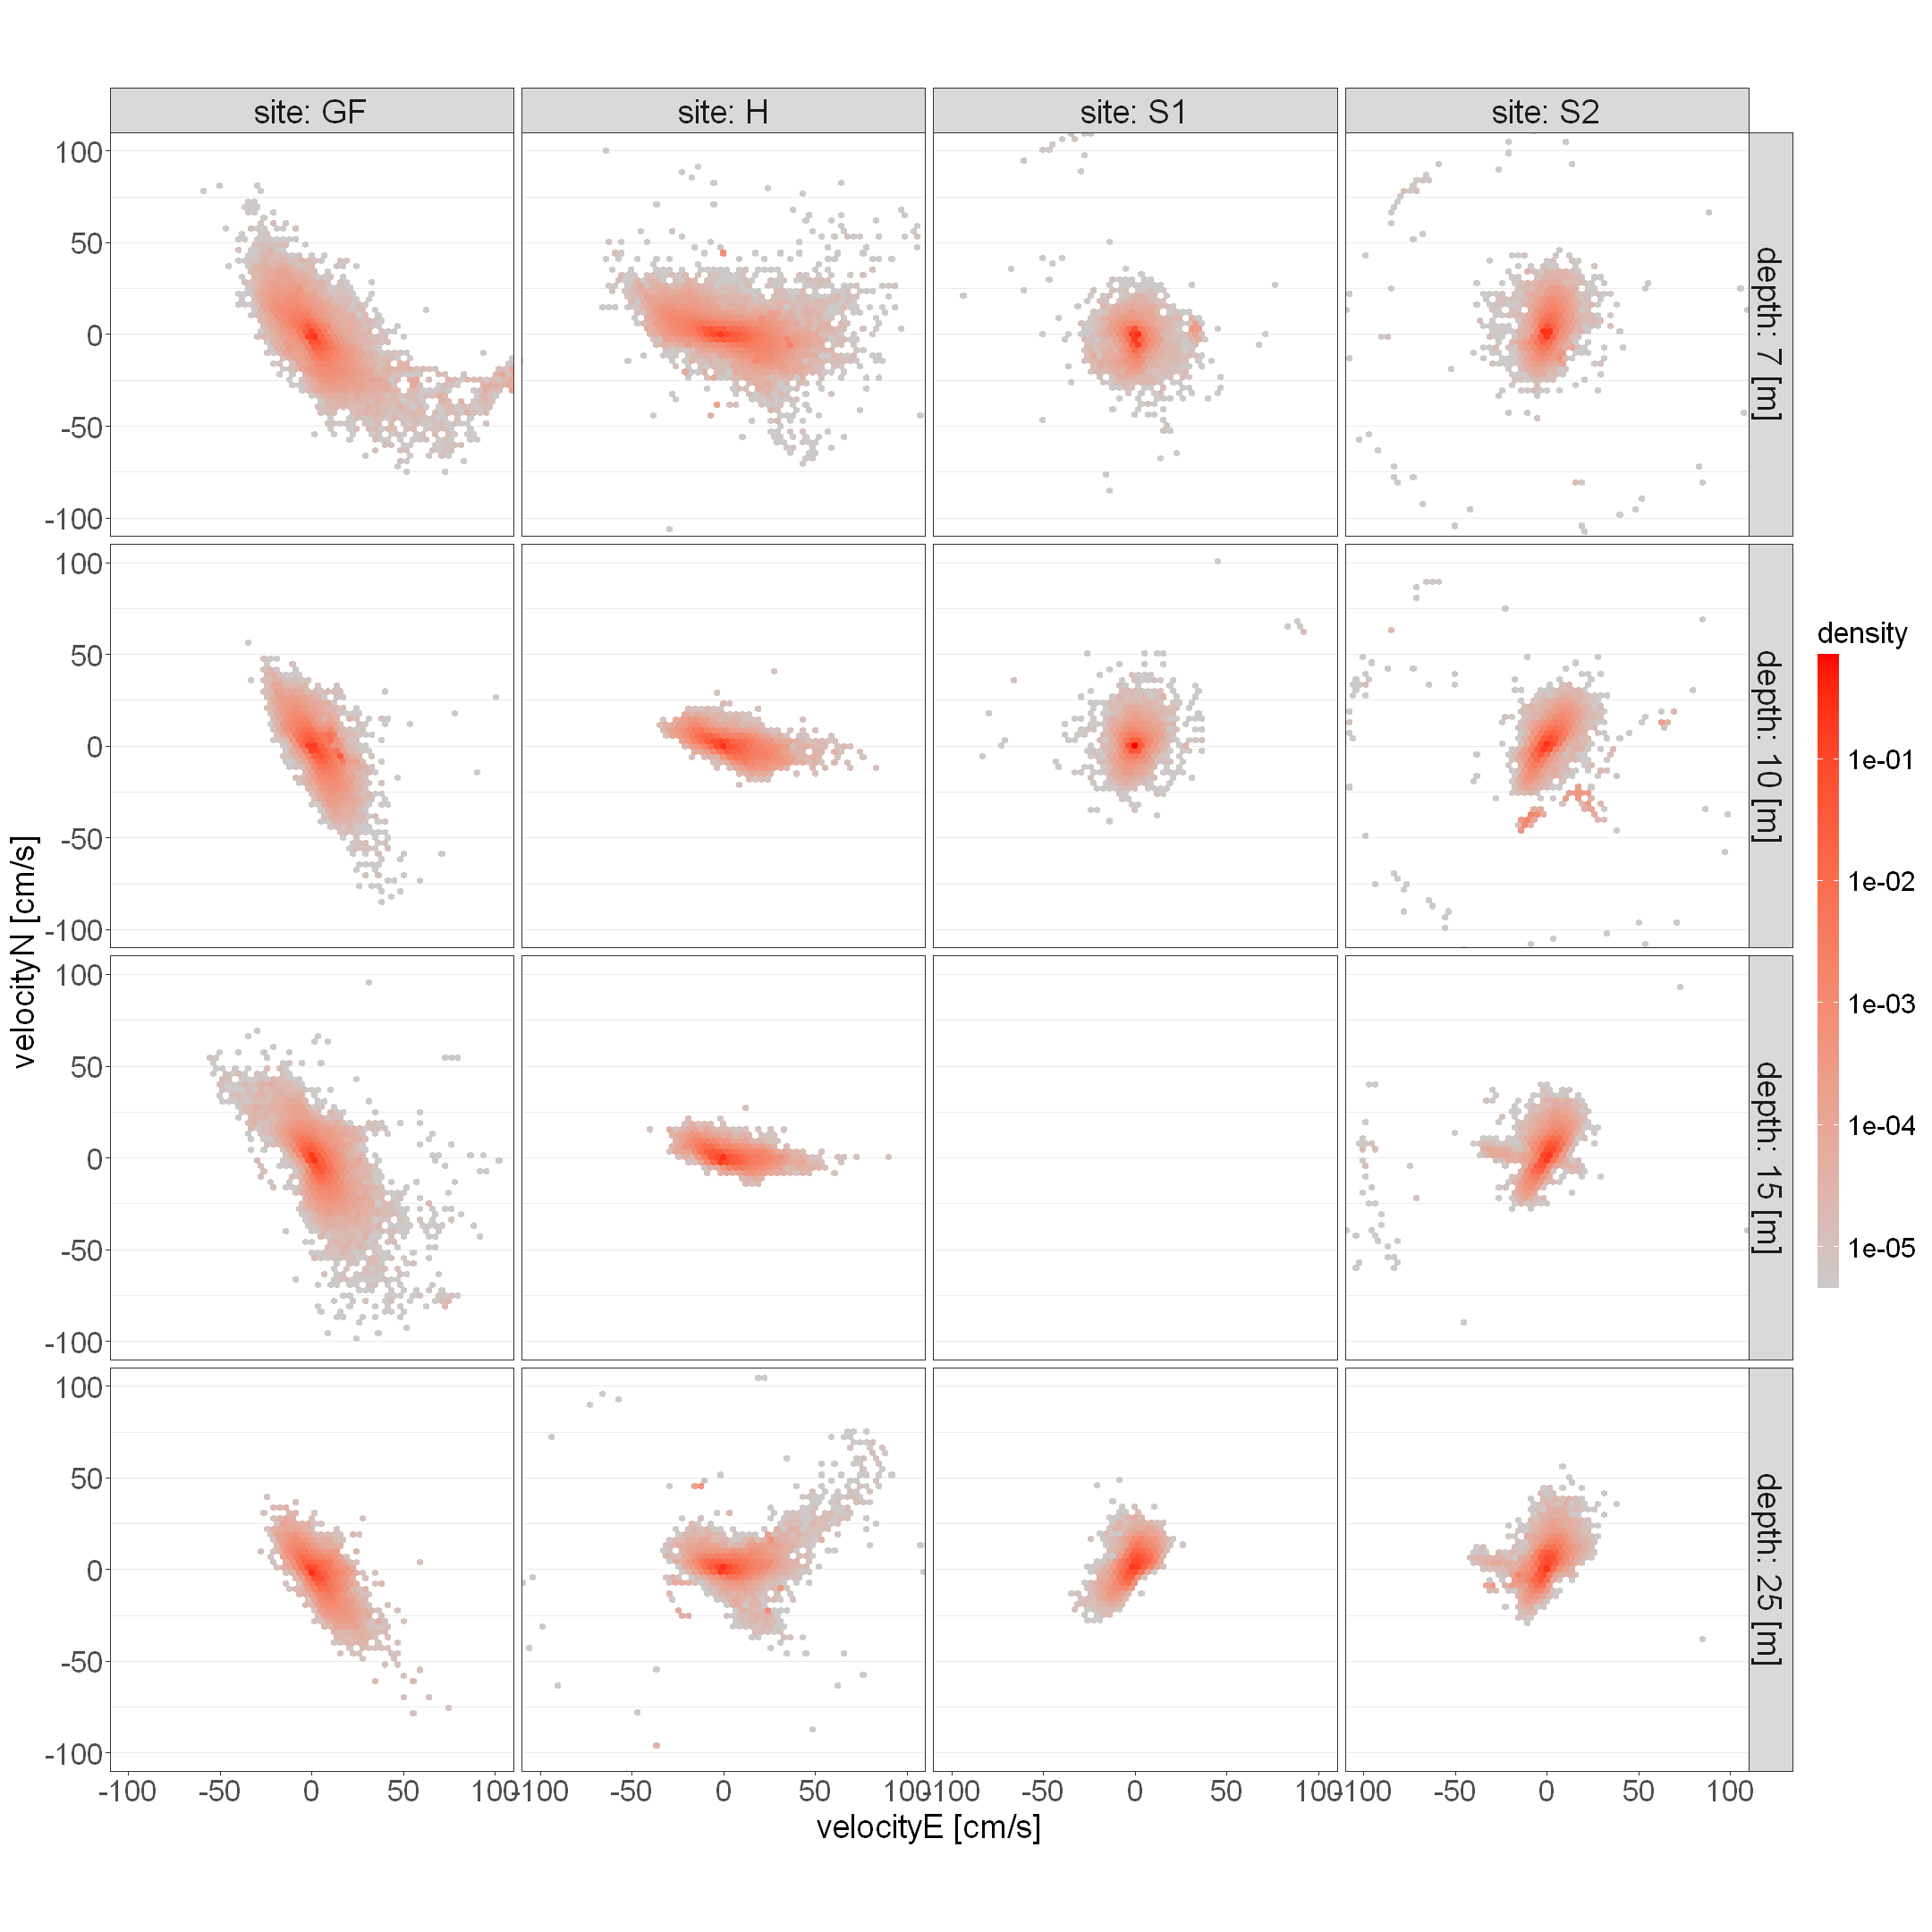

In [22]:
options(repr.plot.width=18,repr.plot.height=18)
ggplot(df.v.merged,aes(x=velocityE,y=velocityN,fill=after_stat(density)) ) + 
geom_hex(bins=70) + facet_grid(depth~site,labeller = label_both) +
scale_fill_gradient(low = "snow3", high = "red", trans = "log10") +
coord_fixed(ratio = 1, xlim = c(-100,100), ylim =c(-100,100), expand = TRUE, clip = "on") +
xlab("velocityE [cm/s]") + ylab("velocityN [cm/s]") +
theme(axis.title = element_text(size=22), #strip.background = element_rect(fill="white"),
                 axis.text = element_text(size=20),
                 strip.text=element_text(size=22),
                 panel.grid.minor.x = element_blank(),
                 panel.grid.major.x = element_blank(),
                 legend.position="right",
                 legend.key.height = unit(3, 'cm'),
                 legend.key.width = unit(0.5, 'cm'),
                 legend.title = element_text(size=20), #change legend title font size
                 legend.text = element_text(size=18)) 

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/hist/","velocity2D_density.tiff"),height = 18, width = 18,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/hist/small/","velocity2D_density.jpg"),height = 18, width = 18,dpi = 150)
    #ggsave(paste0(IMG.path,"../graphical_abstract/velocity2D_density.svg"),height = 18, width = 18) 
}